In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.decomposition import PCA 
import scipy.stats as stats

## Preparing a dataset for modeling:

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

### Data set: 
Ecological footprint data from https://www.kaggle.com/footprintnetwork/ecological-footprint/data

## Initial Variable Selection
* Outcome variable = carbon footprint

* Categorical variable = region
* Continuous variables = GDP, population, total ecological footprint, HDI

## Univariate Analysis

In [261]:
#import data and take initial look
df = pd.read_csv('carbon.csv')  
df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [262]:
#clean GDP attribute and transform to numeric
df['GDP per Capita'] = df['GDP per Capita'].apply(lambda x: str(x).replace('$', ''))
df['GDP per Capita'] = df['GDP per Capita'].apply(lambda x: str(x).replace(',', ''))
df['GDP per Capita'] = df['GDP per Capita'].astype(float)

#describe dataset
df.describe()

,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
count,188.000000,172.00000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,188.000000,188.000000,188.000000
mean,37.342372,0.68636,14238.324913,0.578208,0.263179,0.373815,1.804913,0.122486,3.317606,0.531850,0.456590,2.459191,0.595145,0.067110,4.019681,0.702074,1.915745,4.037397
std,140.756836,0.15604,20927.249796,0.355691,0.352067,0.359349,1.898283,0.158427,2.370931,0.672567,1.014738,10.593956,1.661872,0.054844,11.689075,11.771339,1.369624,12.444616
min,0.000000,0.34000,276.690000,0.070000,0.000000,0.010000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.020000
25%,2.037500,0.55750,1524.390000,0.350000,0.080000,0.170000,0.420000,0.020000,1.482500,0.180000,0.030000,0.060000,0.030000,0.030000,0.675000,-1.935000,0.855000,0.942500
50%,7.970000,0.72000,5430.570000,0.520000,0.180000,0.260000,1.140000,0.070000,2.740000,0.350000,0.120000,0.340000,0.110000,0.050000,1.310000,-0.730000,1.580000,1.705000
75%,24.870000,0.80250,14522.800000,0.700000,0.320000,0.460000,2.600000,0.150000,4.640000,0.590000,0.340000,1.170000,0.370000,0.090000,2.815000,0.212500,2.677500,2.847500
max,1408.040000,0.94000,114665.000000,2.680000,3.470000,3.030000,12.650000,0.820000,15.820000,5.420000,8.230000,95.160000,16.070000,0.270000,111.350000,109.010000,9.140000,159.470000


## Bivariate Analysis - Continuous Variables

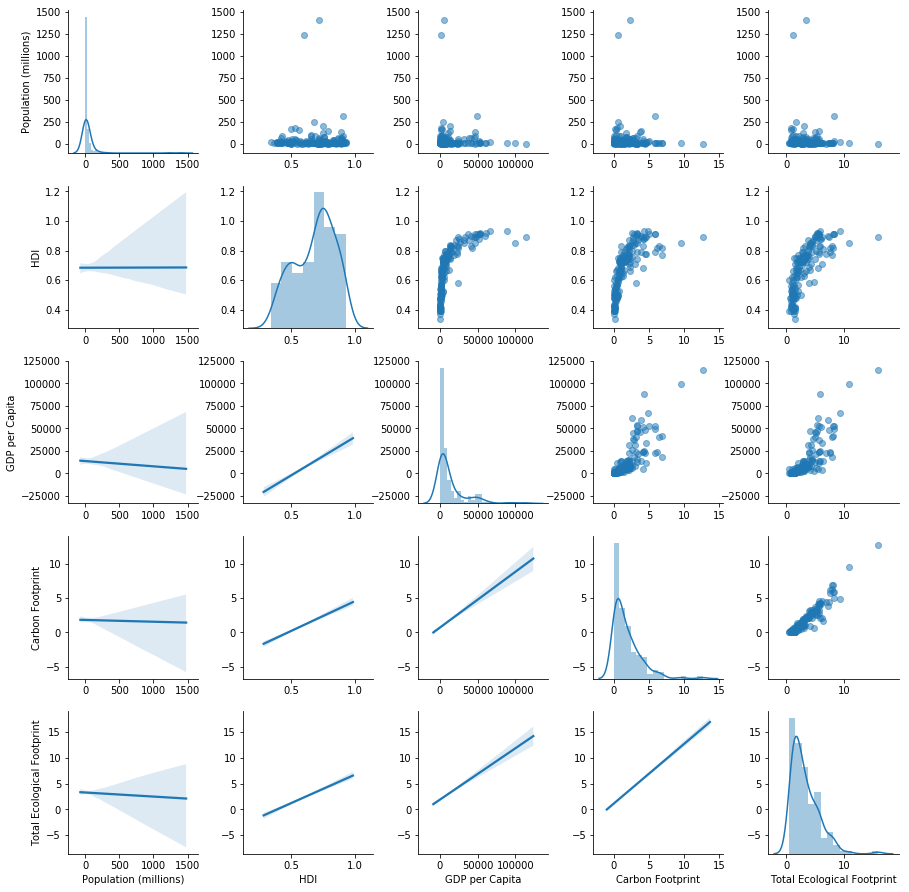

In [263]:
#Subset data
df_sub = df[['Region', 'Population (millions)', 'HDI', 'GDP per Capita', 'Carbon Footprint', 'Total Ecological Footprint']]

#Declare scatterplot matrix
g = sns.PairGrid(df_sub.dropna(), diag_sharey=False)

#Set upper matrix to scatter
g.map_upper(plt.scatter, alpha=.5)

#Set lower matrix to regression lines
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

#Set diagonals to distribution plot
g.map_diag(sns.distplot)
plt.show()

In [264]:
# Make correlation matrix
corrmat = df_sub.corr()
print(corrmat)

                            Population (millions)       HDI  GDP per Capita  \
Population (millions)                    1.000000 -0.002684       -0.049895   
HDI                                     -0.002684  1.000000        0.677448   
GDP per Capita                          -0.049895  0.677448        1.000000   
Carbon Footprint                        -0.021166  0.699447        0.824240   
Total Ecological Footprint              -0.057722  0.739086        0.799412   

                            Carbon Footprint  Total Ecological Footprint  
Population (millions)              -0.021166                   -0.057722  
HDI                                 0.699447                    0.739086  
GDP per Capita                      0.824240                    0.799412  
Carbon Footprint                    1.000000                    0.951867  
Total Ecological Footprint          0.951867                    1.000000  


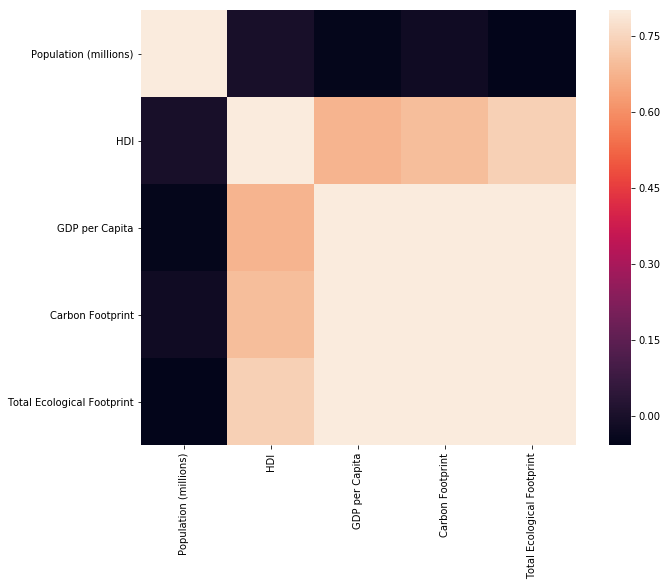

In [265]:
#What does f, ax do?
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Bivariate Analysis - Categorical Variables

In [266]:
df_sub.head()
#df_sub.dtypes

,Region,Population (millions),HDI,GDP per Capita,Carbon Footprint,Total Ecological Footprint
0,Middle East/Central Asia,29.82,0.46,614.66,0.18,0.79
1,Northern/Eastern Europe,3.16,0.73,4534.37,0.87,2.21
2,Africa,38.48,0.73,5430.57,1.14,2.12
3,Africa,20.82,0.52,4665.91,0.20,0.93
4,Latin America,0.09,0.78,13205.10,NaN,5.38


In [267]:
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = pd.melt(df_sub, id_vars=['Region'])
df_long.head()

,Region,variable,value
0,Middle East/Central Asia,Population (millions),29.82
1,Northern/Eastern Europe,Population (millions),3.16
2,Africa,Population (millions),38.48
3,Africa,Population (millions),20.82
4,Latin America,Population (millions),0.09


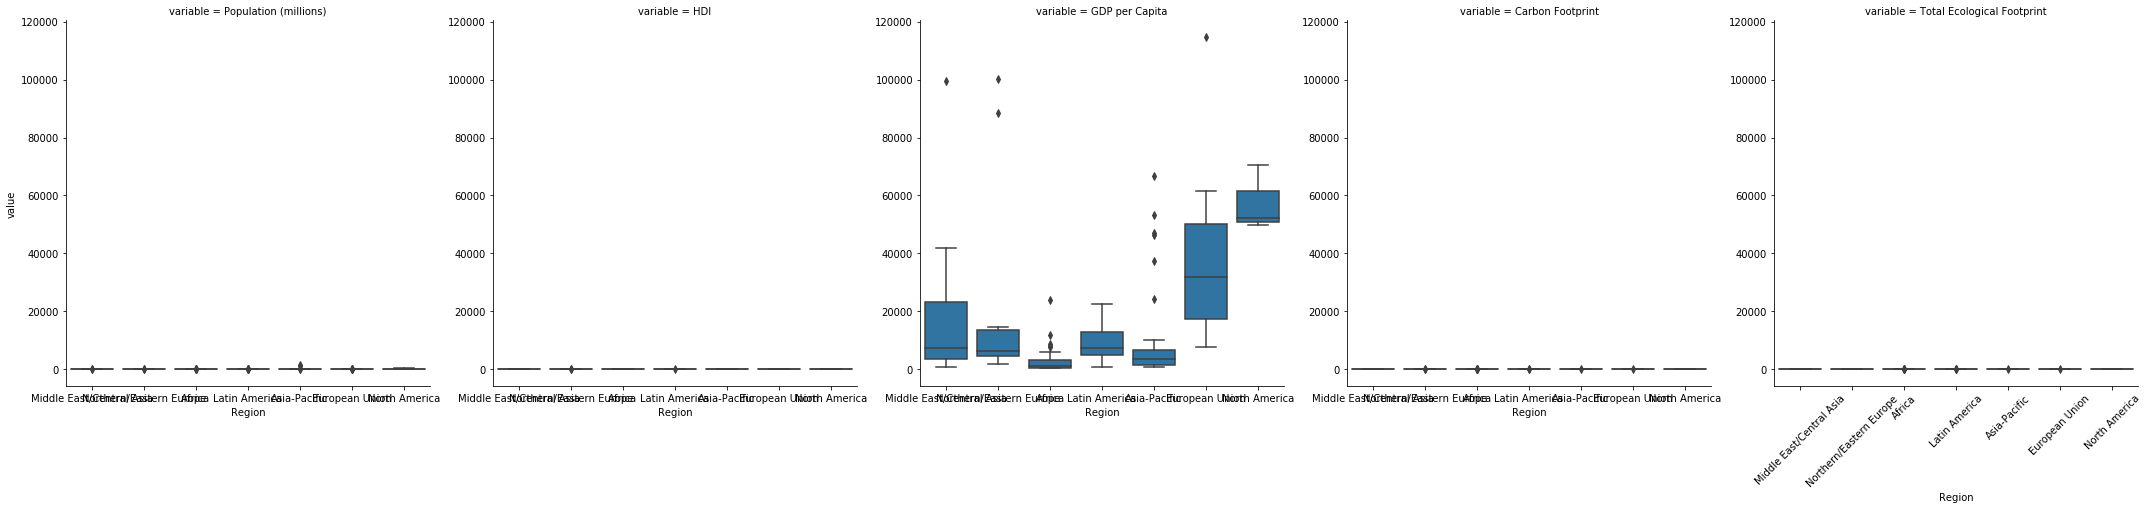

In [268]:
####FIX BOXPLOTS#######

# Plot all the variables with boxplots for each region.

order=df_long.Region.unique()

#Create facetgrid
g = sns.FacetGrid(df_long, col='variable', size=6, aspect=1)
g = g.map(sns.boxplot, 'Region', 'value', order=order)

plt.xticks(rotation=45)  # this isn't working for all subplots!!
plt.show()

In [269]:
#Descriptive statistics by region.
df_sub.groupby('Region').describe()

Carbon Footprint                                    \
                                    count      mean       std   min     25%   
Region                                                                        
Africa                               50.0  0.580800  0.813463  0.01  0.0925   
Asia-Pacific                         30.0  1.514000  1.559356  0.00  0.3575   
European Union                       24.0  3.264167  2.151553  1.46  2.2025   
Latin America                        33.0  1.709394  1.373290  0.15  0.8600   
Middle East/Central Asia             23.0  2.948696  2.623109  0.13  0.9200   
North America                         2.0  5.450000  0.636396  5.00  5.2250   
Northern/Eastern Europe              11.0  2.210909  1.044610  0.87  1.7000   

                                              GDP per Capita                \
                            50%    75%    max          count          mean   
Region                                                                       
Africa                    0.225  0.545   3.27           50.0   2668.142400   
Asia-Pacific              0.835  2.265   5.91           28.0  12192.205000   
European Union            2.795  3.315  12.65           26.0  35819.146923   
Latin America             1.250  2.040   6.89           32.0   8376.773125   
Middle East/Central Asia  1.720  4.590   9.57           22.0  16368.722273   
North America             5.450  5.675   5.90            3.0  57498.900000   
Northern/Eastern Europe   2.060  2.390   4.26           12.0  21373.183333   

                          ...   Population (millions)           \
                          ...                     75%      max   
Region                    ...                                    
Africa                    ...                 21.8475   168.83   
Asia-Pacific              ...                 66.7800  1408.04   
European Union            ...                 20.4975    82.80   
Latin America             ...                 10.8850   198.66   
Middle East/Central Asia  ...                 26.0700    76.42   
North America             ...                176.1700   317.50   
Northern/Eastern Europe   ...                  9.4375   143.17   

                         Total Ecological Footprint                            \
                                              count      mean       std   min   
Region                                                                          
Africa                                         52.0  1.670962  0.870060  0.42   
Asia-Pacific                                   33.0  2.970303  2.180478  0.48   
European Union                                 26.0  5.475385  2.442529  2.71   
Latin America                                  39.0  3.483846  2.154273  0.61   
Middle East/Central Asia                       23.0  4.054348  2.854664  0.79   
North America                                   3.0  7.386667  1.400298  5.77   
Northern/Eastern Europe                        12.0  3.763333  1.351143  1.78   

                                                        
                             25%    50%     75%    max  
Region                                                  
Africa                    1.1050  1.345  2.0450   3.97  
Asia-Pacific              1.2200  2.660  4.0600   9.31  
European Union            4.2525  5.235  5.8600  15.82  
Latin America             2.1250  2.910  4.2050  11.88  
Middle East/Central Asia  1.8950  2.790  5.9150  10.80  
North America             6.9700  8.170  8.1950   8.22  
Northern/Eastern Europe   2.8050  3.520  5.0075   5.79  

[7 rows x 40 columns]

## Create 10 new variables based on analysis

In [270]:
df_sub.head()

,Region,Population (millions),HDI,GDP per Capita,Carbon Footprint,Total Ecological Footprint
0,Middle East/Central Asia,29.82,0.46,614.66,0.18,0.79
1,Northern/Eastern Europe,3.16,0.73,4534.37,0.87,2.21
2,Africa,38.48,0.73,5430.57,1.14,2.12
3,Africa,20.82,0.52,4665.91,0.20,0.93
4,Latin America,0.09,0.78,13205.10,NaN,5.38


In [271]:
### ******************************** 
### figure out pink boxes
### Using .loc and still getting error message.  This code is identical to what is shown in the lesson (2.1.4) and 
### they're not getting this error message

In [272]:
df_sub.loc[:, 'African'] = 0
df_sub['African'] = 0
df_sub.loc[df_sub['Region'] == 'Africa', 'African'] = 1

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [273]:
# Transform categorical Region values into information.  Creates 6 new features (7 regions-1)

# 1. Africa
df_sub['African'] = 0
df_sub['African'][df_sub['Region'] == 'Africa'] = 1

# 2. Asia-Pacific
df_sub['Asia-Pacific'] = 0
df_sub['Asia-Pacific'][df_sub['Region'] == 'Asia-Pacific'] = 1

# 3. EU
df_sub['EU'] = 0
df_sub['EU'][df_sub['Region'] == 'European Union'] = 1

# 4. Latin America
df_sub['Latin America'] = 0
df_sub['Latin America'][df_sub['Region'] == 'Latin America'] = 1

# 5. Middle East/Central Asia
df_sub['MidEast/CenAsia'] = 0
df_sub['MidEast/CenAsia'][df_sub['Region'] == 'Middle East/Central Asia'] = 1

# 6. North America
df_sub['NorAmer'] = 0
df_sub['NorAmer'][df_sub['Region'] == 'North America'] = 1


c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-

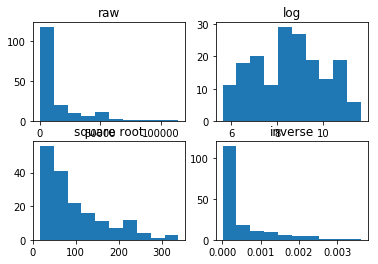

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [274]:
# 7. Transform distribution of GDP per capita 

# Create subplots to look at 4 different transformations
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['GDP per Capita'].dropna())
plt.title('raw')

fig.add_subplot(222)
plt.hist(np.log(df['GDP per Capita'].dropna()))
plt.title('log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['GDP per Capita'].dropna()))
plt.title('square root')

fig.add_subplot(224)
plt.hist(1/df['GDP per Capita'].dropna())
plt.title('inverse')

plt.show()

# log transform is more evenly distributed than any other transform, 
# so make new feature log_GDP.

df_sub['log_GDP'] = np.log(df['GDP per Capita'])

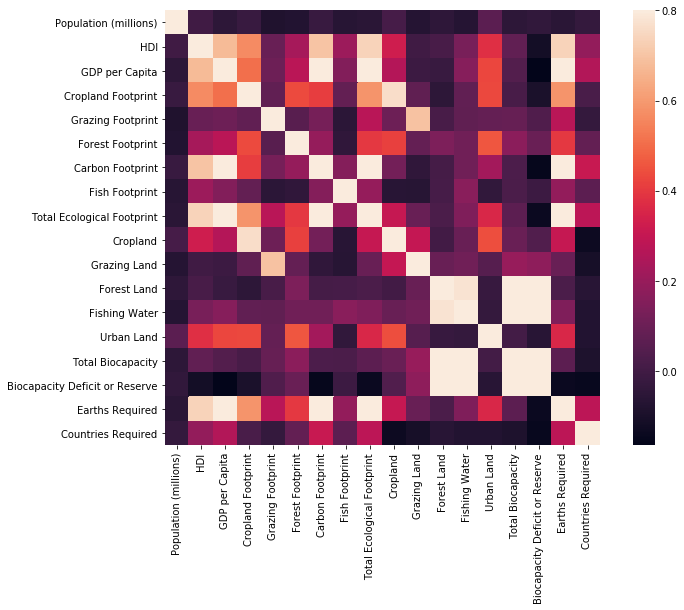

In [275]:
#Bring in new features from the data set that inital data exploration did not consider.

# Make correlation matrix for all data
corrmat = df.corr()

#Plot and look for new variables with high correlation to target variable (carbon footprint)
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [276]:
# From the heat map, it looks like 'earths required' and 'cropland footprint' are new features that are highly correlated 
# with the target variable.  'Urban land' is also decently correlated with the target variable, so we'll make that a new 
# feature as well.

# Again using df_sub to store our model input features

df_sub['earths required'] = df['Earths Required']
df_sub['cropland footprint'] = df['Cropland Footprint']
df_sub['urban land'] = df['Urban Land']

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [277]:
# Review initial features data frame
features = df_sub.dropna()
features.head()
#features.describe()
features.dtypes

Region                         object
Population (millions)         float64
HDI                           float64
GDP per Capita                float64
Carbon Footprint              float64
Total Ecological Footprint    float64
African                         int64
Asia-Pacific                    int64
EU                              int64
Latin America                   int64
MidEast/CenAsia                 int64
NorAmer                         int64
log_GDP                       float64
earths required               float64
cropland footprint            float64
urban land                    float64
dtype: object

## Use filter methods to select the best 5 features

In [278]:
# Using univariate feature selection to choose features with highest correlation to target value.

# import test methods 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  

df = features
X = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14,15]]
Y = df.iloc[:,5]

# feature extraction
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features...what is this actually printing?  Useful data appears to be in fit.scores_, not this
print(features[0:6,:])

[  1.872e+02   3.673e+02   1.441e+17   3.896e+01   2.128e-01   2.777e+01
   2.186e-01   4.060e+00   9.468e+00   3.226e+02   2.480e+07   8.888e+01
   2.726e+01]
[[  4.600e-01   6.147e+02   7.900e-01   6.421e+00   4.600e-01]
 [  7.300e-01   4.534e+03   2.210e+00   8.419e+00   1.270e+00]
 [  7.300e-01   5.431e+03   2.120e+00   8.600e+00   1.220e+00]
 [  5.200e-01   4.666e+03   9.300e-01   8.448e+00   5.400e-01]
 [  8.300e-01   1.354e+04   3.140e+00   9.513e+00   1.820e+00]
 [  7.300e-01   3.426e+03   2.230e+00   8.139e+00   1.290e+00]]


In [283]:
# top 5 features correspond to columns: 2,3,5,12,13
# columns 3 & 12 redundant
# is there a better way to summarize fit.scores and columns so that I don't have to manually go through list and select
# highest values?

df.iloc[:, [2,3,5,12,13]].head()

,HDI,GDP per Capita,Total Ecological Footprint,log_GDP,earths required
0,0.46,614.66,0.79,6.421069,0.46
1,0.73,4534.37,2.21,8.419441,1.27
2,0.73,5430.57,2.12,8.599799,1.22
3,0.52,4665.91,0.93,8.448038,0.54
5,0.83,13540.00,3.14,9.513404,1.82


In [285]:
### Getting code to run but am I using the output correctly?  Documentation isn't very helpful.
### If running above cell triggers error, rerun entire notebook.  For some reason that fixes the issue.

# code based on this example, modified to f_regression for continuous data rather than chi2:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [281]:
X = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14,15]]
X.head()

,HDI,GDP per Capita,Total Ecological Footprint,African,Asia-Pacific,EU,Latin America,MidEast/CenAsia,NorAmer,log_GDP,earths required,cropland footprint,urban land
0,0.46,614.66,0.79,0,0,0,0,1,0,6.421069,0.46,0.30,0.04
1,0.73,4534.37,2.21,0,0,0,0,0,0,8.419441,1.27,0.78,0.06
2,0.73,5430.57,2.12,1,0,0,0,0,0,8.599799,1.22,0.60,0.03
3,0.52,4665.91,0.93,1,0,0,0,0,0,8.448038,0.54,0.33,0.04
5,0.83,13540.00,3.14,0,0,0,1,0,0,9.513404,1.82,0.78,0.10


In [282]:
df.iloc[:, 4].head()

0    0.18
1    0.87
2    1.14
3    0.20
5    1.08
Name: Carbon Footprint, dtype: float64